In [20]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/jw3514/Work/CellType_Psy/src/')
from CellType_PSY import *
from tabulate import tabulate
import os
#import scanpy as sc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from matplotlib import rcParams, font_manager
font_path = '/usr/share/fonts/truetype/msttcorefonts/Arial.ttf'  # Replace with the actual path
rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

In [307]:
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/msttcorefonts/Arial.ttf'
fm.fontManager.addfont(font_path)  # Only if you're adding a new font file
fm._load_fontmanager(try_read_cache=False)

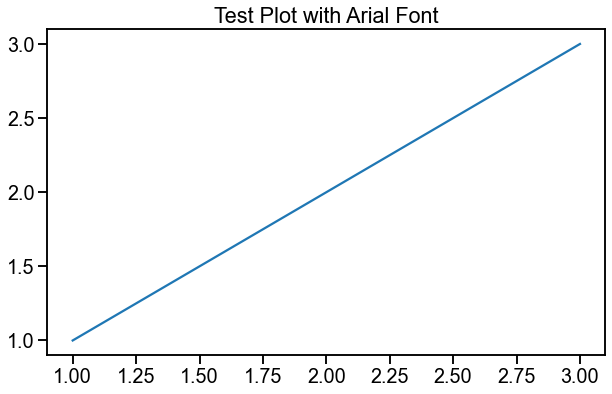

In [308]:
plt.figure(figsize=(10, 6))
plt.title('Test Plot with Arial Font', fontfamily='Arial')
plt.plot([1, 2, 3], [1, 2, 3])
plt.show()

In [4]:
#! pip install scanpy h5py anndata numpy --upgrade

In [3]:
def Z1Conversion(ExpMat, outname="test.z1.mat"):
    Z_mat = []
    for g, row in ExpMat.iterrows():
        tmp = ZscoreConverting(row.values)
        Z_mat.append(tmp)
    Z_mat = np.array(Z_mat)
    CT_Z1_DF = pd.DataFrame(data=Z_mat, index=ExpMat.index.values, 
                            columns=ExpMat.columns.values)
    CT_Z1_DF.to_csv(outname)
    return CT_Z1_DF

## File Downloads

In [1]:
import requests

In [12]:
collection_id = "01234567-89ab-cdef-0123-456789abcdef"

In [13]:
domain_name = "cellxgene.cziscience.com"
site_url = f"https://{domain_name}"
api_url_base = f"https://api.{domain_name}"

In [18]:
dataset_path = f"/curation/v1/collections/{collection_id}"
url = f"{api_url_base}{dataset_path}"
res = requests.get(url=url)
res.raise_for_status()
res_content = res.json()
print(res_content)

HTTPError: 404 Client Error: Not Found for url: https://api.cellxgene.cziscience.com/curation/v1/collections/01234567-89ab-cdef-0123-456789abcdef

## Example: Make subclass Exp Mat

In [26]:
HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol = LoadGeneINFO()
HumanCodingGenes = HGNC["symbol"].values
HGNC_symbols = HGNC["symbol"].values

In [2]:
SaveDIR = "/home/jw3514/Work/data/Human_Brain_Cell_Atlas/Subcluster_GeneXCell/"

In [3]:
Subcluster_anno = pd.read_excel("/home/jw3514/Work/data/HumanBrainCellType/subcluster_annotation.xlsx",
                               index_col="Subcluster")

In [47]:
Subcluster_anno.shape

(3313, 20)

In [4]:
Subcluster_anno.head(2)

,Cluster,Supercluster,Transferred MTG Label (Transferred from cluster level),Class,Neurotransmitter,Neuropeptide,Top ROIGroupFine,Top ROI,Top enriched genes,Number of cells,Number of donors,DoubletFinderScore,TotalUMI,unspliced_ratio,MT_ratio,H18.30.001,H18.30.002,H19.30.001,H19.30.002,Fraction cells from top donor
Subcluster,,,,,,,,,,,,,,,,,,,,
0,297,Upper rhombic lip,NaN,NaN,NT-VGLUT1,NP-CHGA NP-CHGB NP-GRP NP-NUCB NP-NUCB NP-NXPH...,"Midbrain: 97.1%, Thalamus: 2.9%","SC: 73.5%, SN: 20.6%, PAG: 2.9%",['TPH1' 'RBP3' 'AC004852.2' 'GABRR3' 'AQP3' 'N...,34,2,0.012989,7235.000000,0.625557,0.009278,0,8,0,26,26
1,308,Upper rhombic lip,NaN,NaN,NT-VGLUT1,NP-ADCYAP NP-AGT NP-CBLN NP-CHGA NP-CHGB NP-NA...,"Cerebellum: 91.8%, Pons: 7.7%, Myelencephalon:...","CBV: 88.6%, PnAN: 6.8%, CBL: 2.3%",['AC017037.5' 'AC084740.1' 'EOMES' 'LMX1A' 'CS...,220,3,0.104209,11801.659091,0.680623,0.006574,0,75,103,42,103


In [ ]:
for i, row in Subcluster_anno.iterrows():    
    subcluster_name = "{}-{}-{}".format(idx, row["Cluster"], row["Supercluster"])

In [5]:
#cluster_clean_name = re.sub(r'\W+', '_', cluster)

In [6]:
h5ad = sc.read_h5ad("/home/jw3514/Work/data/HumanBrainCellType/SuperTypeRawDat/Supercluster_CGE_interneuron.h5ad")

In [8]:
h5ad

AnnData object with n_obs × n_vars = 227671 × 59236
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_UMAP', 'X_tSNE'

In [12]:
#def dumpsubcluster()
Supercluster = "CGE interneuron"

Supercluster_fname = re.sub(r'\W+', '_', Supercluster)
Supercluster_fname = "Supercluster_{}.h5ad".format(Supercluster_fname)
#h5ad = sc.read_h5ad("/home/jw3514/Work/data/HumanBrainCellType/SuperTypeRawDat/{}".format(Supercluster_fname))

In [16]:
_subcluster_id = 585
_subcluster_ann = Subcluster_anno.loc[_subcluster_id, :]
_subcluster_name = "{}-{}-{}".format(_subcluster_id, _subcluster_ann["Cluster"], _subcluster_ann["Supercluster"])
print(_subcluster_name)

585-280-CGE interneuron


In [14]:
subcluster_h5ad = h5ad[h5ad.obs["subcluster_id"]==_subcluster_id]

In [17]:
subcluster_h5ad

View of AnnData object with n_obs × n_vars = 1001 × 59236
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_UMAP', 'X_tSNE'

In [18]:
subcluster_h5ad.var = subcluster_h5ad.var.set_index("Gene")

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['AC112770.1', 'LINC01697', 'PRKG1', 'MME', 'C6orf141']

    Inferred to be: categorical

  value_idx = self._prep_dim_index(value.index, attr)


In [44]:
DF = subcluster_h5ad.to_df()

In [45]:
# Only keep protein coding genes
genes = np.array(list(set(DF.columns.values).intersection(set(HGNC_symbols))))
DF = DF[genes]
DF = DF.transpose()
DF.index = [int(GeneSymbol2Entrez[x]) for x in DF.index.values]
DF = DF.sort_index()

In [43]:
#SaveDIR = "/home/jw3514/Work/data/Human_Brain_Cell_Atlas/Subcluster_GeneXCell/"
SaveDIR = "/home/jw3514/Work/data/HumanBrainCellType/Subcluster_GeneXCell/"
DF.to_csv("{}/{}.csv.gz".format(SaveDIR, _subcluster_id), compression="gzip")

In [48]:
## Aggregate splited files into one matrix

Indv_cluster_means = []
Indv_cluster_total_UMIs = []
Gene_Total_Exp = []
Total_N_Cells = 0
for _subcluster_id, _subcluster_ann in Subcluster_anno.iterrows():
    _subcluster_name = "{}-{}-{}".format(_subcluster_id, _subcluster_ann["Cluster"], _subcluster_ann["Supercluster"])
    gene_mean_logUMI = pd.read_csv(("/home/jw3514/Work/data/HumanBrainCellType/Subcluster_GeneXCell/SplitCTs/{}.csv".format(_subcluster_id)),
                                  index_col=0)
    gene_mean_logUMI.rename(columns={"0": _subcluster_name}, inplace=True)
    #if len(gene_mean_logUMI) != 17938:
    #    print(cluster, cluster_clean_name, len(gene_mean_logUMI))
    #Total_N_Cells += cluster_v3_cell_counts
    #print(cluster_v3_cell_counts)
    #if len(Gene_Total_Exp) == 0:
    #    Gene_Total_Exp = gene_mean_logUMI * cluster_v3_cell_counts
    #else:
    #    Gene_Total_Exp += gene_mean_logUMI * cluster_v3_cell_counts
    #gene_mean_logUMI.name = cluster
    Indv_cluster_means.append(gene_mean_logUMI)

# Make and save cluster Exp Mat
Cluster_Exp_DF = pd.concat(Indv_cluster_means, axis=1)
Cluster_Exp_DF.to_csv("/home/jw3514/Work/data/HumanBrainCellType/subcluster_MeanLogUMI.csv")

In [49]:
Cluster_Exp_DF

,0-297-Upper rhombic lip,1-308-Upper rhombic lip,2-308-Upper rhombic lip,3-308-Upper rhombic lip,4-308-Upper rhombic lip,5-308-Upper rhombic lip,6-309-Upper rhombic lip,7-309-Upper rhombic lip,8-309-Upper rhombic lip,9-310-Upper rhombic lip,...,3303-1-Miscellaneous,3304-1-Miscellaneous,3305-1-Miscellaneous,3306-1-Miscellaneous,3307-2-Miscellaneous,3308-2-Miscellaneous,3309-2-Miscellaneous,3310-2-Miscellaneous,3311-2-Miscellaneous,3312-2-Miscellaneous
1,0.029412,0.068954,0.056604,0.125020,0.108191,0.215190,0.060606,0.064409,0.174367,0.047938,...,0.033443,0.014035,0.031725,0.015873,0.007092,0.021429,0.025978,0.053941,0.010753,0.027027
2,0.000000,0.131476,0.144892,0.178941,0.172020,0.164557,0.060606,0.043568,0.080460,0.042635,...,0.159930,0.478220,0.563228,0.417174,0.138739,0.069678,0.074797,0.178470,0.172043,0.150945
9,0.058824,0.039023,0.072647,0.088435,0.097831,0.063291,0.015152,0.004545,0.011494,0.003963,...,0.000000,0.017544,0.008850,0.007937,0.007092,0.018464,0.000000,0.023529,0.010753,0.000000
10,0.000000,0.004545,0.005348,0.012195,0.010638,0.000000,0.000000,0.004545,0.000000,0.001824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002994,0.003509,0.000000,0.000000,0.000000,0.000000,0.007246,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113523639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
114483833,0.000000,0.000000,0.000000,0.000000,0.008431,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008982,0.000000,0.017699,0.007937,0.000000,0.000000,0.000000,0.011765,0.000000,0.000000
114515518,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
116033993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011494,0.000157,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Make Z2 Mat Cluster (460)

In [2]:
HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol = LoadGeneINFO()
HumanCodingGenes = HGNC["symbol"].values
HGNC_symbols = HGNC["symbol"].values

In [3]:
fil = "/home/jw3514/Work/data/HumanBrainCellType/adult_human_20221007.agg.loom"
adata = sc.read_loom(fil)

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/_io/read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

In [4]:
adata.var_names_make_unique()

/home/jw3514/anaconda3/lib/python3.9/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


In [5]:
CT_ExpMat = pd.DataFrame(data=adata.X.toarray(), index=adata.obs.index.values, columns=adata.var.index.values)

In [6]:
genes = np.array(list(set(CT_ExpMat.columns.values).intersection(set(HGNC_symbols))))
CT_ExpMat = CT_ExpMat[genes]
CT_ExpMat = CT_ExpMat.transpose()
CT_ExpMat.columns = [int(x) for x in CT_ExpMat.columns.values]

In [7]:
Anno = pd.read_excel("../../data/HumanBrainCellType/annotation.xlsx", index_col="Cluster")
Anno.drop(Anno.tail(1).index,inplace=True) # drop last n rows
Anno.index = [int(x) for x in Anno.index.values]
Neur_idx = [str(int(x)) for x in Anno[Anno["Class auto-annotation"]=="NEUR"].index]
Neur_idx = list(set(CT_ExpMat.columns.values).intersection(set(Neur_idx)))

In [8]:
CT_ExpMat.index = [int(GeneSymbol2Entrez[x]) for x in CT_ExpMat.index.values]
CT_ExpMat.to_csv("../dat/Human.CT.Exp.Entrez.csv")

##### [Start] calculate Overall expression level for each gene

In [9]:
#CT_ExpMat_log2 = np.log2(CT_ExpMat+1)
#CT_ExpMat_log2.to_csv("../dat/Human.CT.Exp.Entrez.log2.csv")

In [69]:
CT_ExpMat_log2 = pd.read_csv("../dat/HumanCTExpressionMats/Human.CT.Exp.Entrez.log2.csv", index_col=0)

(array([7.255658e+06, 9.862910e+05, 2.992790e+05, 9.779400e+04,
        3.448100e+04, 1.252700e+04, 3.798000e+03, 8.590000e+02,
        8.300000e+01, 2.000000e+00]),
 array([ 0.       ,  1.0986045,  2.197209 ,  3.2958135,  4.394418 ,
         5.4930225,  6.591627 ,  7.6902315,  8.788836 ,  9.8874405,
        10.986045 ]),
 <BarContainer object of 10 artists>)

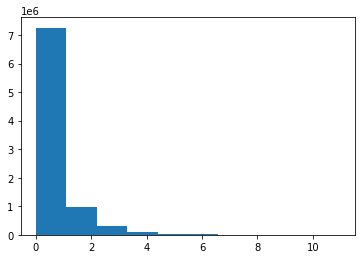

In [70]:
plt.hist(CT_ExpMat_log2.values.flatten())

In [71]:
def Z1Conversion(ExpMat, outname="test.z1.mat"):
    Z_mat = []
    for g, row in ExpMat.iterrows():
        tmp = ZscoreConverting(row.values)
        Z_mat.append(tmp)
    Z_mat = np.array(Z_mat)
    CT_Z1_DF = pd.DataFrame(data=Z_mat, index=ExpMat.index.values, 
                            columns=ExpMat.columns.values)
    CT_Z1_DF.to_csv(outname)
    return CT_Z1_DF

In [72]:
ExpDF_Z1 = Z1Conversion(CT_ExpMat_log2, "../dat/Human.CT.Exp.Entrez.log2.Z1.csv")
max_Z, min_Z = 5, -5
ExpDF_Z1_clipped = ExpDF_Z1.clip(upper=max_Z, lower=min_Z)
ExpDF_Z1_clipped.to_csv("../dat/Human.CT.Exp.Entrez.log2.Z1.clip.csv")

/home/jw3514/Work/ASD_Circuits/src/ASD_Circuits.py:69: RuntimeWarning: invalid value encountered in double_scalars
  z = (x - mean)/std


In [73]:
max_Z, min_Z = 3, -3
ExpDF_Z1_clipped = ExpDF_Z1.clip(upper=max_Z, lower=min_Z)
ExpDF_Z1_clipped.to_csv("../dat/Human.CT.Exp.Entrez.log2.Z1.clip3.csv")

In [17]:
# Combine Z2 mat

In [18]:
Z2_split_dir = "/home/jw3514/Work/CellType_Psy/dat/Z2.Split/Z2.ExpL.HumanCTMatch/"
DFs = []
for file in os.listdir(Z2_split_dir):
    df = pd.read_csv(Z2_split_dir + file, index_col = 0)
    DFs.append(df)
Z2_MAt = pd.concat(DFs)
Z2_MAt.to_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.CT.Exp.Entrez.log2.Z2.HCT.csv")

In [19]:
Z2_split_dir = "/home/jw3514/Work/CellType_Psy/dat/Z2.Split/Z2.ExpL.BrainSpanMatch/"
DFs = []
for file in os.listdir(Z2_split_dir):
    df = pd.read_csv(Z2_split_dir + file, index_col = 0)
    DFs.append(df)
Z2_MAt = pd.concat(DFs)
Z2_MAt.to_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.CT.Exp.Entrez.log2.Z2.BSP.csv")

In [4]:
Z2_split_dir = "/home/jw3514/Work/CellType_Psy/dat2/Z2.Split/Z2.ExpL.HumanCTMatch_z1clip3/"
DFs = []
for file in os.listdir(Z2_split_dir):
    df = pd.read_csv(Z2_split_dir + file, index_col = 0)
    DFs.append(df)
Z2_MAt = pd.concat(DFs)
Z2_MAt.to_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.CT.Exp.Entrez.log2.Z2.HCT.z1clip3.csv")

#### Compare 2 Z2

In [5]:
Z2_Z1clip5 = pd.read_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.CT.Exp.Entrez.log2.Z2.HCT.csv", index_col=0)
Z2_Z1clip3 = pd.read_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.CT.Exp.Entrez.log2.Z2.HCT.z1clip3.csv", index_col=0)

In [8]:
genes = Z2_Z1clip3.index.values

In [13]:
X = Z2_Z1clip5.loc[genes, "1"]
Y = Z2_Z1clip3.loc[genes, "1"]

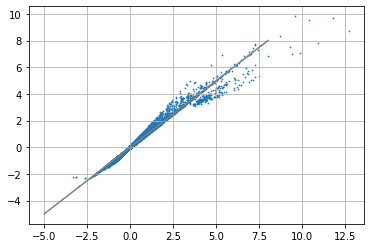

In [18]:
plt.scatter(X,Y,s=0.5)
plt.plot([-5,8], [-5, 8], color="grey")
plt.grid(True)

<AxesSubplot: xlabel='1', ylabel='Density'>

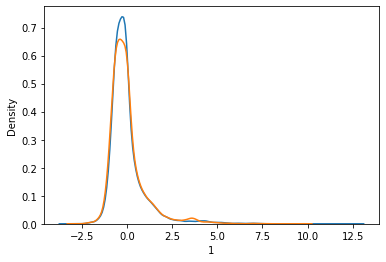

In [17]:
sns.kdeplot(X)
sns.kdeplot(Y)

# Combine Z2M

In [3]:
Z2_split_dir = "/home/jw3514/Work/CellType_Psy/dat/Z2.Split/Residue_ALLCT.Z2/"
DFs = []
for file in os.listdir(Z2_split_dir):
    df = pd.read_csv(Z2_split_dir + file, index_col = 0)
    DFs.append(df)
Z2_MAt = pd.concat(DFs)
Z2_MAt.to_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.Residue.Z2.csv")

## Make Z2 Subcluster

In [22]:
Cluster_Exp_DF = pd.read_csv("../dat/HumanCTExpressionMats/subcluster_MeanLogUMI.csv", index_col=0)

(array([5.4008293e+07, 5.8795440e+06, 1.7028890e+06, 5.5875400e+05,
        2.0437300e+05, 7.6112000e+04, 2.3510000e+04, 5.7620000e+03,
        7.0800000e+02, 4.4000000e+01]),
 array([ 0.        ,  1.06083212,  2.12166424,  3.18249636,  4.24332848,
         5.3041606 ,  6.36499272,  7.42582483,  8.48665695,  9.54748907,
        10.60832119]),
 <BarContainer object of 10 artists>)

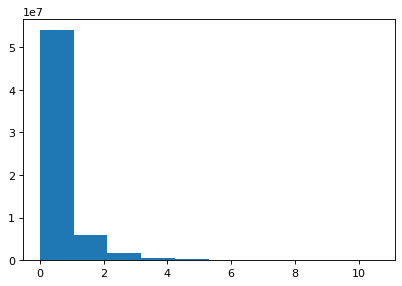

In [23]:
plt.hist(Cluster_Exp_DF.values.flatten())

In [24]:
SubCluster_Z1 = Z1Conversion(Cluster_Exp_DF, "../dat/Human.Subcluster.log2.Z1.csv")
max_Z, min_Z = 3, -3
SubCluster_Z1_clipped = SubCluster_Z1.clip(upper=max_Z, lower=min_Z)
SubCluster_Z1_clipped.to_csv("../dat/HumanCTExpressionMats/Human.Subcluster.log2.Z1.clip3.csv")

/home/jw3514/Work/ASD_Circuits/src/ASD_Circuits.py:69: RuntimeWarning: invalid value encountered in double_scalars
  z = (x - mean)/std


In [25]:
SubCluster_Z1_clipped.head(2)

,0-297-Upper rhombic lip,1-308-Upper rhombic lip,2-308-Upper rhombic lip,3-308-Upper rhombic lip,4-308-Upper rhombic lip,5-308-Upper rhombic lip,6-309-Upper rhombic lip,7-309-Upper rhombic lip,8-309-Upper rhombic lip,9-310-Upper rhombic lip,...,3303-1-Miscellaneous,3304-1-Miscellaneous,3305-1-Miscellaneous,3306-1-Miscellaneous,3307-2-Miscellaneous,3308-2-Miscellaneous,3309-2-Miscellaneous,3310-2-Miscellaneous,3311-2-Miscellaneous,3312-2-Miscellaneous
1,-0.899004,-0.444026,-0.586127,0.201069,0.007432,1.238571,-0.54008,-0.496326,0.768860,-0.685840,...,-0.852621,-1.075929,-0.872383,-1.054781,-1.155814,-0.990859,-0.938513,-0.616772,-1.113696,-0.926442
2,-0.641199,-0.138994,-0.087752,0.042309,0.015873,-0.012635,-0.40970,-0.474781,-0.333864,-0.478343,...,-0.030309,1.185473,1.510183,0.952293,-0.111252,-0.375049,-0.355496,0.040508,0.015959,-0.064630


In [58]:
for X in SubCluster_Z1_clipped.columns.values:
    print(X)

0-297-Upper rhombic lip
1-308-Upper rhombic lip
2-308-Upper rhombic lip
3-308-Upper rhombic lip
4-308-Upper rhombic lip
5-308-Upper rhombic lip
6-309-Upper rhombic lip
7-309-Upper rhombic lip
8-309-Upper rhombic lip
9-310-Upper rhombic lip
10-311-Upper rhombic lip
11-311-Upper rhombic lip
12-311-Upper rhombic lip
13-311-Upper rhombic lip
14-310-Upper rhombic lip
15-310-Upper rhombic lip
16-312-Upper rhombic lip
17-312-Upper rhombic lip
18-312-Upper rhombic lip
19-312-Upper rhombic lip
20-312-Upper rhombic lip
21-314-Miscellaneous
22-363-Splatter
23-363-Splatter
24-363-Splatter
25-363-Splatter
26-363-Splatter
27-341-Splatter
28-342-Splatter
29-342-Splatter
30-342-Splatter
31-342-Splatter
32-342-Splatter
33-342-Splatter
34-336-Splatter
35-338-Splatter
36-338-Splatter
37-338-Splatter
38-338-Splatter
39-339-Splatter
40-339-Splatter
41-460-Thalamic excitatory
42-460-Thalamic excitatory
43-460-Thalamic excitatory
44-459-Thalamic excitatory
45-459-Thalamic excitatory
46-453-Thalamic excitator

In [26]:
SubCluster_Z1_clipped = SubCluster_Z1_clipped[~SubCluster_Z1_clipped.index.duplicated(keep='first')]

In [27]:
SubCluster_Z1_clipped.to_csv("../dat/HumanCTExpressionMats/Human.Subcluster.log2.Z1.clip3.csv")

In [28]:
SubCluster_Z1_clipped.loc[9782, "0-297-Upper rhombic lip"]

-0.3993095793153873

In [29]:
Z2_split_dir = "/home/jw3514/Work/CellType_Psy/dat2/Z2.Split/Z2.Subcluster.HumanCTMatch.clip3/"
DFs = []
for file in os.listdir(Z2_split_dir):
    df = pd.read_csv(Z2_split_dir + file, index_col = 0)
    DFs.append(df)
Z2_MAt = pd.concat(DFs)
Z2_MAt.to_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.Subcluster.log2.Z2.clip3.csv")

In [30]:
Z2_MAt.head(2)

,0-297-Upper rhombic lip,1-308-Upper rhombic lip,2-308-Upper rhombic lip,3-308-Upper rhombic lip,4-308-Upper rhombic lip,5-308-Upper rhombic lip,6-309-Upper rhombic lip,7-309-Upper rhombic lip,8-309-Upper rhombic lip,9-310-Upper rhombic lip,...,3303-1-Miscellaneous,3304-1-Miscellaneous,3305-1-Miscellaneous,3306-1-Miscellaneous,3307-2-Miscellaneous,3308-2-Miscellaneous,3309-2-Miscellaneous,3310-2-Miscellaneous,3311-2-Miscellaneous,3312-2-Miscellaneous
135228,0.469759,-0.222272,-0.514078,-0.452619,-0.547523,-0.582483,0.077098,0.340083,0.063562,0.463676,...,0.368589,0.397244,0.244947,0.344907,0.284761,0.239112,0.392884,0.240544,0.384398,0.584975
135250,-0.593053,0.871012,-1.090916,-0.010128,-1.087916,-0.062874,-0.788605,-0.93952,-0.823238,-0.481847,...,-0.625259,-0.599123,-0.578011,-0.587474,-0.579816,-0.588676,-0.564956,-0.599025,-0.568825,-0.571446


In [32]:
max_Z, min_Z = 3, -3
Z2_MAt = Z2_MAt.clip(upper=max_Z, lower=min_Z)
Z2_MAt.to_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.Subcluster.log2.Z2.clip3.3.csv")

# Check Correlation between Cell Types

In [5]:
HCT_Z2_MAT_HCT = pd.read_csv("../dat/HumanCTExpressionMats/Human.CT.Exp.Entrez.log2.Z2.HCT.z1clip3.csv", index_col=0)
max_Z, min_Z = 3, -3
HCT_Z2_MAT_HCT = HCT_Z2_MAT_HCT.clip(upper=max_Z, lower=min_Z)

In [7]:
def compute_cell_type_correlations(df):
    # Compute the correlation matrix
    correlation_matrix = df.corr(method='spearman')  # You can also use 'pearson' or 'kendall' based on your need
    
    return correlation_matrix

In [8]:
correlation_matrix = compute_cell_type_correlations(HCT_Z2_MAT_HCT)

In [9]:
correlation_matrix.head(2)

,0,1,2,3,4,5,6,7,8,9,...,451,452,453,454,455,456,457,458,459,460
0,1.000000,0.837946,0.812232,0.790190,0.760495,0.777451,0.736411,0.763683,0.713927,0.764759,...,-0.338113,-0.086478,-0.217939,-0.215030,-0.243928,0.114788,-0.293778,-0.387450,-0.397627,-0.373236
1,0.837946,1.000000,0.922803,0.815791,0.783935,0.809819,0.759888,0.794076,0.738999,0.794532,...,-0.350648,-0.093012,-0.228203,-0.225132,-0.262013,0.109334,-0.309970,-0.402327,-0.417757,-0.392378


(array([ 3440., 33462., 49876., 53842., 36232., 17720.,  9262.,  5658.,
         2034.,   995.]),
 array([-0.52554809, -0.37299328, -0.22043847, -0.06788366,  0.08467115,
         0.23722595,  0.38978076,  0.54233557,  0.69489038,  0.84744519,
         1.        ]),
 <BarContainer object of 10 artists>)

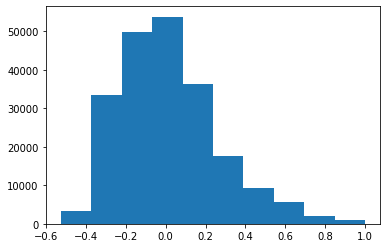

In [10]:
plt.hist(correlation_matrix.values.flatten())

In [12]:
HCT_Z2_MAT_HCT.fillna(0, inplace=True)

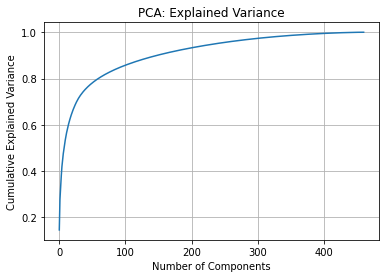

In [13]:
from sklearn.decomposition import PCA

def perform_pca(df):
    pca = PCA()
    pca.fit(df.T)  # Transpose to have cell types as rows
    
    # Plot the explained variance to find the 'elbow' (number of significant components)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA: Explained Variance')
    plt.grid(True)
    plt.show()

    return pca

# Example usage:
pca_result = perform_pca(HCT_Z2_MAT_HCT)


In [24]:

explained_variance_ratio = pca_result.explained_variance_ratio_

# Compute the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find the number of components required to explain 80% variance
num_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of components that explain 80% of the variance: {num_components}")

num_components = np.argmax(cumulative_variance >= 0.7) + 1
print(f"Number of components that explain 70% of the variance: {num_components}")

num_components = np.argmax(cumulative_variance >= 0.6) + 1
print(f"Number of components that explain 60% of the variance: {num_components}")


Number of components that explain 80% of the variance: 60
Number of components that explain 70% of the variance: 28
Number of components that explain 60% of the variance: 15


In [28]:
num_components = np.argmax(cumulative_variance >= 0.78) + 1
print(f"Number of components that explain 60% of the variance: {num_components}")

Number of components that explain 60% of the variance: 51


In [22]:
0.05/60

0.0008333333333333334

# Re processing Cluster level data

In [4]:
Subcluster_anno = pd.read_excel("/home/jw3514/Work/data/HumanBrainCellType/subcluster_annotation.xlsx", index_col="Subcluster")
DatDIR = "/home/jw3514/Work/data/HumanBrainCellType/Subcluster_GeneXCell/"

In [32]:
def processHumanCT_Cluster(cluster, annotation, DatDIR):
    print("Processing {}".format(cluster))
    subclusters = annotation[annotation["Cluster"]==cluster].index.values
    print(subclusters)
    
    dfs = []
    for subcluster in subclusters:
        df = pd.read_csv("{}/{}.csv.gz".format(DatDIR, subcluster), index_col=0)
        dfs.append(df)
    
    # Concatenate all dataframes along columns
    combined_df = pd.concat(dfs, axis=1)
    combined_df.to_csv("/home/jw3514/Work/data/HumanBrainCellType/cluster_GeneXCell/{}.csv.gz".format(cluster))
    
    # Calculate plain mean for comparison
    gene_means = combined_df.values.mean(axis=1) 
    gene_means = pd.Series(data=gene_means, index=combined_df.index)
    gene_means.to_csv("/home/jw3514/Work/data/HumanBrainCellType/cluster_GeneXCell/SplitCTs/{}_mean.csv".format(cluster))
    
    # Apply log2(x+1) transformation and take mean across cells
    gene_log2_means = np.log2(combined_df.values + 1).mean(axis=1)
    gene_log2_means = pd.Series(data=gene_log2_means, index=combined_df.index)
    gene_log2_means.to_csv("/home/jw3514/Work/data/HumanBrainCellType/cluster_GeneXCell/SplitCTs/{}_log2mean.csv".format(cluster))

        #Gene_Cluster_Mean = pd.Series(data=gene_dat, index=gene_index)
        #Gene_Cluster_Mean.to_csv("/home/jw3514/Work/data/HumanBrainCellType/Subcluster_GeneXCell/SplitCTs/{}.csv".format(cluster))

In [ ]:
        # with gz.open("{}/{}.csv.gz".format(DatDIR, cluster), 'rt') as csvfile:
        #     gene_dat = []
        #     gene_index = []
        #     reader = csv.reader(csvfile)
        #     head = next(reader)
        #     for row in reader:
        #         gene_index.append(int(row[0]))
        #         log2UMI = np.log2(np.array([float(x) for x in row[1:]]) + 1)
        #         gene_dat.append(log2UMI.mean())

In [17]:
cluster = 308
processHumanCT_Cluster(cluster, Subcluster_anno, DatDIR)

Processing 308
[1 2 3 4 5]


In [12]:
subcluster = 1
df = pd.read_csv("{}/{}.csv.gz".format(DatDIR, subcluster), index_col=0)
df.shape



(18853, 220)

In [13]:
df.head(2)

,10X237_2:AGTGCCGGTTAGTCGT,10X174_2:AGGGTGACAAGGTCTT,10X243_1:AACCACAGTCTAATCG,10X174_2:TGCAGTACAATTGCTG,10X174_1:ATGCCTCAGTTCCTGA,10X174_2:CATTGAGTCGGTCTAA,10X237_2:CAATACGGTCAATGGG,10X243_1:TGTAACGGTGTCCATA,10X174_1:GCTGCAGGTATTGGCT,10X243_8:GCTTGGGGTTCCGCTT,...,10X356_3:CCAATGAAGTCAGCGA,10X243_3:GTTCTATGTCCTGAAT,10X356_3:ACGTCCTCATGTCAGT,10X237_2:AAGTCGTAGCATGAAT,10X243_4:CAGATACGTGTCATCA,10X243_1:GTGGAAGCAGCGAACA,10X243_1:TCCTCTTGTGCGTCGT,10X237_2:GCGTTTCCAGCTAACT,10X174_1:TGACAGTTCGCCAACG,10X174_2:CTTTCAACAGATACTC
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
Clusters = Subcluster_anno["Cluster"].unique()
Clusters.sort()

In [4]:
Anno.head(2)

,Supercluster,Class auto-annotation,Neurotransmitter auto-annotation,Neuropeptide auto-annotation,Subtype auto-annotation,Transferred MTG Label,Top three regions,Top three dissections,Top Enriched Genes,Number of cells,DoubletFinder score,Total UMI,Fraction unspliced,Fraction mitochondrial,H19.30.002,H19.30.001,H18.30.002,H18.30.001,Fraction cells from top donor
0,Miscellaneous,BCELL,,,,,"Midbrain: 21.0%, Basal forebrain: 19.0%, Pons:...","Human GPi: 11.4%, Human SN: 11.4%, Human SN-RN...","IGHM, MS4A1, FCRL1, AC244205.1, IGLL5, IGHA1, ...",105.0,0.013358,2258.866667,0.608113,0.020989,58.0,20.0,27.0,0.0,0.552381
1,Miscellaneous,TCELL,,,,,"Midbrain: 15.0%, Basal forebrain: 14.0%, Pons:...","Human SpC: 8.2%, Human CbDN: 7.6%, Human SN: 7.4%","CD2, IL7R, PTPRC, SLFN12L, IL32, CCL5, GRAP2, ...",2474.0,0.022371,2184.314470,0.582884,0.021212,708.0,400.0,1364.0,2.0,0.551334


In [7]:
## Aggregate splited files into one matrix

Indv_cluster_means = []
Indv_cluster_log2means = []
Missing_Clusters = []
for cluster, row in Anno.iterrows():
    #_subcluster_name = "{}-{}-{}".format(_subcluster_id, _subcluster_ann["Cluster"], _subcluster_ann["Supercluster"])
    try:
        gene_mean_UMI = pd.read_csv(("/home/jw3514/Work/data/HumanBrainCellType/cluster_GeneXCell/SplitCTs/{}_mean.csv".format(cluster)), index_col=0)
        gene_mean_logUMI = pd.read_csv(("/home/jw3514/Work/data/HumanBrainCellType/cluster_GeneXCell/SplitCTs/{}_log2mean.csv".format(cluster)), index_col=0)
        gene_mean_UMI.rename(columns={"0": cluster}, inplace=True)
        gene_mean_logUMI.rename(columns={"0": cluster}, inplace=True)

        Indv_cluster_means.append(gene_mean_UMI)
        Indv_cluster_log2means.append(gene_mean_logUMI)
    except:
        print("{} not found".format(cluster))
        Missing_Clusters.append(cluster)
# Make and save cluster Exp Mat
Cluster_Exp_DF = pd.concat(Indv_cluster_means, axis=1)
Cluster_Exp_DF.to_csv("/home/jw3514/Work/data/HumanBrainCellType/cluster_MeanUMI.csv")
Cluster_Exp_DF_log2 = pd.concat(Indv_cluster_log2means, axis=1)
Cluster_Exp_DF_log2.to_csv("/home/jw3514/Work/data/HumanBrainCellType/cluster_MeanLogUMI.csv")


In [36]:
import gzip
def processHumanCT_Cluster_LargeFile(cluster, annotation, DatDIR):
    print("Processing {}".format(cluster))
    subclusters = annotation[annotation["Cluster"]==cluster].index.values
    print(subclusters)
    
    # Initialize dictionaries to store sums and counts
    gene_sums = {}
    gene_counts = {}
    gene_log2_sums = {}
    first_file = True
    
    # Process each subcluster file
    for subcluster in subclusters:
        with gzip.open("{}/{}.csv.gz".format(DatDIR, subcluster), 'rt') as f:
            reader = csv.reader(f)
            header = next(reader) # Skip header
            
            # For first file, initialize gene names
            if first_file:
                gene_names = []
                for row in reader:
                    gene_name = row[0]
                    gene_names.append(gene_name)
                    values = [float(x) for x in row[1:]]
                    gene_sums[gene_name] = sum(values)
                    gene_counts[gene_name] = len(values)
                    gene_log2_sums[gene_name] = sum(np.log2(np.array(values) + 1))
                first_file = False
            else:
                for row in reader:
                    gene_name = row[0]
                    values = [float(x) for x in row[1:]]
                    gene_sums[gene_name] += sum(values)
                    gene_counts[gene_name] += len(values)
                    gene_log2_sums[gene_name] += sum(np.log2(np.array(values) + 1))
    
    # Calculate means and save results
    with open("/home/jw3514/Work/data/HumanBrainCellType/cluster_GeneXCell/SplitCTs/{}_mean.csv".format(cluster), 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['gene','0'])
        for gene in gene_names:
            mean = gene_sums[gene] / gene_counts[gene]
            writer.writerow([gene, mean])
            
    with open("/home/jw3514/Work/data/HumanBrainCellType/cluster_GeneXCell/SplitCTs/{}_log2mean.csv".format(cluster), 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['gene','0']) 
        for gene in gene_names:
            log2_mean = gene_log2_sums[gene] / gene_counts[gene]
            writer.writerow([gene, log2_mean])

In [38]:
#Cluster_Exp_DF.to_csv("/home/jw3514/Work/data/HumanBrainCellType/cluster_MeanUMI.csv")
#Cluster_Exp_DF_log2.to_csv("/home/jw3514/Work/data/HumanBrainCellType/cluster_MeanLogUMI.csv")


Processing 308
[1 2 3 4 5]


: 

In [8]:
Cluster_Exp_DF.head(2)

,0,1,2,3,4,5,6,7,8,9,...,451,452,453,454,455,456,457,458,459,460
1,0.047619,0.042037,0.023845,0.029821,0.017450,0.055341,0.032596,0.013006,0.017419,0.016263,...,0.168172,0.026963,0.120230,0.121416,0.116034,0.037328,0.054054,0.128770,0.159751,0.072645
2,0.009524,0.258690,0.154993,0.069583,1.433557,1.543115,3.030584,2.584829,2.644645,2.632139,...,0.098665,0.107058,0.173506,0.105945,0.094937,0.053045,0.047297,0.194956,0.423120,0.730255


In [9]:
Cluster_Exp_DF_log2.head(2)


,0,1,2,3,4,5,6,7,8,9,...,451,452,453,454,455,456,457,458,459,460
1,0.047619,0.039551,0.022608,0.029821,0.017450,0.052986,0.030356,0.012467,0.016312,0.015620,...,0.158439,0.026140,0.113538,0.115180,0.109905,0.036513,0.052652,0.121945,0.146977,0.068295
2,0.009524,0.198945,0.122174,0.060318,0.929704,1.061998,1.649576,1.513101,1.518719,1.576216,...,0.090112,0.098945,0.137162,0.093522,0.082478,0.052230,0.044493,0.165590,0.305066,0.439340


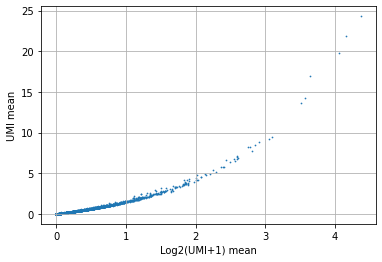

In [25]:
genes = Cluster_Exp_DF.index.values
ct = 10
X = Cluster_Exp_DF_log2.loc[genes, ct]
Y = Cluster_Exp_DF.loc[genes, ct]
plt.scatter(X,Y,s=0.5)
#plt.plot([-5,8], [-5, 8], color="grey")
plt.grid(True)
plt.xlabel("Log2(UMI+1) mean")
plt.ylabel("UMI mean")
plt.show()


In [34]:
HumanCTExp_Entrez = pd.read_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.CT.Exp.Entrez.csv", index_col=0)
HumanCTExp_Entrez.head(2)
# make column int
HumanCTExp_Entrez.columns = [int(x) for x in HumanCTExp_Entrez.columns.values]
HumanCTExp_Entrez = HumanCTExp_Entrez.loc[~HumanCTExp_Entrez.index.duplicated(keep='first')]

In [43]:

Cluster_Exp_DF = Cluster_Exp_DF.loc[~Cluster_Exp_DF.index.duplicated(keep='first')]


In [44]:
print(len(X), len(Y))

18839 18853


18839
[[1.         0.99999965]
 [0.99999965 1.        ]]
18839 18839


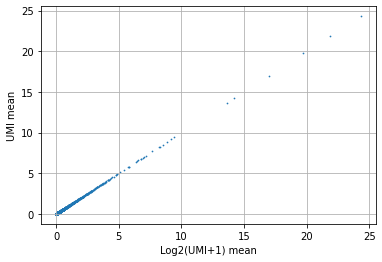

In [46]:
gene1 = Cluster_Exp_DF.index.values
gene2 = HumanCTExp_Entrez.index.values
common_genes = list(set(gene1).intersection(set(gene2)))
print(len(common_genes))
ct = 10
X = HumanCTExp_Entrez.loc[common_genes, ct].values  # Add .values to ensure numpy array
Y = Cluster_Exp_DF.loc[common_genes, ct].values     # Add .values to ensure numpy array
# compute correlation
print(np.corrcoef(X, Y))
print(len(X), len(Y))
plt.figure()  # Create new figure
plt.scatter(X, Y, s=0.5)
plt.grid(True)
plt.xlabel("Log2(UMI+1) mean")
plt.ylabel("UMI mean")
plt.show()


In [47]:
Cluster_Exp_DF_log2 = Cluster_Exp_DF_log2.loc[~Cluster_Exp_DF_log2.index.duplicated(keep='first')]

In [149]:
Cluster_Exp_DF_log2.to_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.Cluster.Log2Mean.Exp.csv")

(array([8.125e+03, 1.650e+03, 1.299e+03, 1.024e+03, 8.450e+02, 7.360e+02,
        6.120e+02, 5.420e+02, 4.680e+02, 3.880e+02, 3.360e+02, 2.870e+02,
        2.600e+02, 2.310e+02, 1.890e+02, 1.730e+02, 1.550e+02, 1.580e+02,
        1.350e+02, 1.450e+02, 9.100e+01, 9.000e+01, 7.900e+01, 8.400e+01,
        6.500e+01, 5.100e+01, 5.200e+01, 4.200e+01, 3.700e+01, 4.100e+01,
        4.600e+01, 2.900e+01, 2.700e+01, 2.800e+01, 2.800e+01, 1.300e+01,
        3.100e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.300e+01, 1.300e+01,
        1.600e+01, 1.000e+01, 1.500e+01, 1.600e+01, 1.000e+01, 4.000e+00,
        6.000e+00, 9.000e+00, 2.000e+00, 6.000e+00, 1.000e+00, 2.000e+00,
        9.000e+00, 6.000e+00, 4.000e+00, 3.000e+00, 4.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00, 7.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 1.000e+0

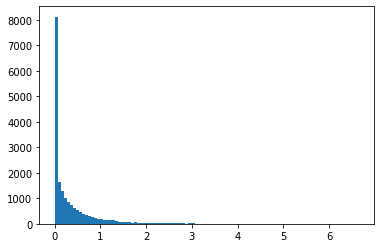

In [56]:
plt.hist(Cluster_Exp_DF_log2[300], bins=100)

(array([1.7307e+04, 8.7400e+02, 2.7600e+02, 1.0100e+02, 6.0000e+01,
        5.4000e+01, 2.5000e+01, 2.2000e+01, 2.0000e+01, 1.9000e+01,
        7.0000e+00, 1.1000e+01, 7.0000e+00, 4.0000e+00, 5.0000e+00,
        3.0000e+00, 3.0000e+00, 5.0000e+00, 1.0000e+00, 0.0000e+00,
        5.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 6.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

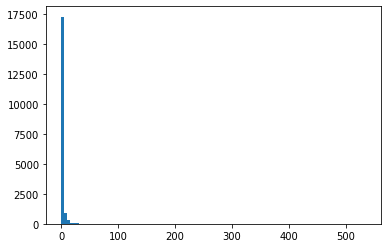

In [54]:
plt.hist(Cluster_Exp_DF[400], bins=100)

In [4]:
def ZscoreConverting_V2(values, mean=np.nan, std=np.nan, low_exp = 0, min_z=-5): 
    """
    Convert values to z-scores with special handling for zeros:
    - Build distribution using only non-zero values
    - Set minimum z-score to min_z (default -5)
    - Set all zero expressions to min_z (default -5)
    
    Args:
        values: Array-like input values
        mean: Optional pre-computed mean
        std: Optional pre-computed standard deviation
        min_z: Minimum z-score (default -5)
    Returns:
        numpy array of z-scores
    """
    # Convert to numpy array and identify non-zero values
    values = np.array(values)
    non_zero_mask = values >= low_exp
    non_zero_values = values[non_zero_mask]
    
    # If no non-zero values, return array of -5
    if len(non_zero_values) == 0:
        return np.full_like(values, min_z)
    
    # Calculate mean and std from non-zero values if not provided
    if mean != mean:  # Check for nan
        mean = np.mean(non_zero_values)
    if std != std:    # Check for nan
        std = np.std(non_zero_values)
        # Handle case where std is 0
        if std == 0:
            std = 1
    
    # Calculate z-scores
    zscores = np.full_like(values, min_z)  # Initialize with -5
    non_zero_zscores = (non_zero_values - mean) / std
    
    # Apply minimum threshold 
    non_zero_zscores = np.maximum(non_zero_zscores, min_z)
    
    # Put non-zero z-scores back in original positions
    zscores[non_zero_mask] = non_zero_zscores
    
    return zscores

def Z1Conversion(ExpMat, outname="test.z1.mat"):
    Z_mat = []
    for g, row in ExpMat.iterrows():
        tmp = ZscoreConverting(row.values)
        Z_mat.append(tmp)
    Z_mat = np.array(Z_mat)
    CT_Z1_DF = pd.DataFrame(data=Z_mat, index=ExpMat.index.values, 
                            columns=ExpMat.columns.values)
    CT_Z1_DF.to_csv(outname)
    return CT_Z1_DF

def Z1Conversion_V2(ExpMat, outname="test.z1.mat", low_exp = 0, min_z=-5):
    """
    Convert expression matrix to z-scores with zero handling
    
    Args:
        ExpMat: pandas DataFrame with genes as rows and cell types as columns
        outname: output file name for saving results
        
    Returns:
        pandas DataFrame with z-scores
    """
    Z_mat = []
    for g, row in ExpMat.iterrows():
        tmp = ZscoreConverting_V2(row.values, min_z=min_z)
        Z_mat.append(tmp)
    
    Z_mat = np.array(Z_mat)
    CT_Z1_DF = pd.DataFrame(data=Z_mat, 
                           index=ExpMat.index.values,
                           columns=ExpMat.columns.values)
    
    CT_Z1_DF.to_csv(outname)
    return CT_Z1_DF

In [5]:
Cluster_Exp_DF_log2 = pd.read_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.Cluster.Log2Mean.Exp.csv", index_col=0)

In [14]:
# Check how 0-expressed genes specificity score 
HumanCT_Z1 = Z1Conversion_V2(Cluster_Exp_DF_log2, min_z=-5)
max_Z, min_Z = 5, -5
HumanCT_Z1 = HumanCT_Z1.clip(upper=max_Z, lower=min_Z)
HumanCT_Z1.to_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.Cluster.Log2Mean.Exp.Z1.clip5.csv")

In [21]:
# Check how 0-expressed genes specificity score 
HumanCT_Z1 = Z1Conversion_V2(Cluster_Exp_DF_log2, min_z=-3)
max_Z, min_Z = 3, -3
HumanCT_Z1 = HumanCT_Z1.clip(upper=max_Z, lower=min_Z)
HumanCT_Z1.to_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.Cluster.Log2Mean.Exp.Z1.clip3.csv")

In [6]:
HumanCT_Z1_2 = Z1Conversion_V2(Cluster_Exp_DF_log2, low_exp=1e-3, min_z=-5)
max_Z, min_Z = 5, -5
HumanCT_Z1_2 = HumanCT_Z1_2.clip(upper=max_Z, lower=min_Z)
HumanCT_Z1_2.to_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.Cluster.Log2Mean.Exp.Z1.clip5.lowexp_1e-3.csv")

In [12]:
HumanCT_Z1.columns = [int(x) for x in HumanCT_Z1.columns.values]
Cluster_Exp_DF_log2.columns = [int(x) for x in Cluster_Exp_DF_log2.columns.values]

In [7]:
HumanCT_Z1_old = pd.read_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.CT.Exp.Entrez.log2.Z1.csv", index_col=0)
HumanCT_Z1_old.columns = [int(x) for x in HumanCT_Z1_old.columns.values]

18839


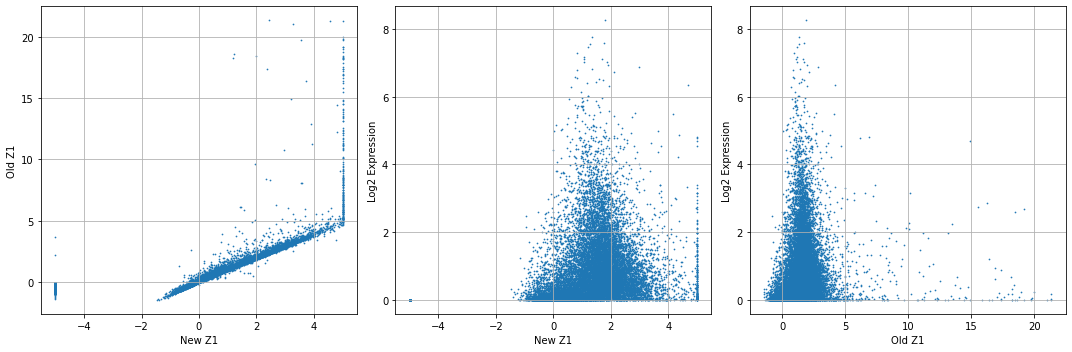

In [13]:
# Get gene lists from both matrices
gene1 = HumanCT_Z1.index.values
gene2 = HumanCT_Z1_old.index.values
common_genes = list(set(gene1).intersection(set(gene2)))
print(len(common_genes))

# Convert column index to string since that appears to be the issue
ct = 400  # Convert to string to match column names

# Extract values for common genes
X = HumanCT_Z1.loc[common_genes, ct].values
Y = HumanCT_Z1_old.loc[common_genes, ct].values
Z = Cluster_Exp_DF_log2.loc[common_genes, ct].values


# Create scatter plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(X, Y, s=0.5)
ax1.grid(True)
ax1.set_xlabel("New Z1")
ax1.set_ylabel("Old Z1")

ax2.scatter(X, Z, s=0.5) 
ax2.grid(True)
ax2.set_xlabel("New Z1")
ax2.set_ylabel("Log2 Expression")

ax3.scatter(Y, Z, s=0.5)
ax3.grid(True)
ax3.set_xlabel("Old Z1")
ax3.set_ylabel("Log2 Expression")

plt.tight_layout()
plt.show()


In [103]:
#HumanCT_Z2 = pd.read_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.CT.Exp.Entrez.log2.Z2.HCT.z1clip3.csv", index_col=0)
HumanCT_Z2 = pd.read_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.Cluster.Log2Mean.Z2.csv", index_col=0)
HumanCT_Z2_Res = pd.read_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.Residue.Z2.csv", index_col=0)
HumanCT_Z2.columns = [int(x) for x in HumanCT_Z2.columns.values]
HumanCT_Z2_Res.columns = [int(x) for x in HumanCT_Z2_Res.columns.values]
# set max min
max_Z, min_Z = 3, -3
HumanCT_Z2_Res = HumanCT_Z2_Res.clip(upper=max_Z, lower=min_Z)

In [104]:
#HumanCT_Z2_Res.to_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.Residue.Z2.clip3.3.csv")

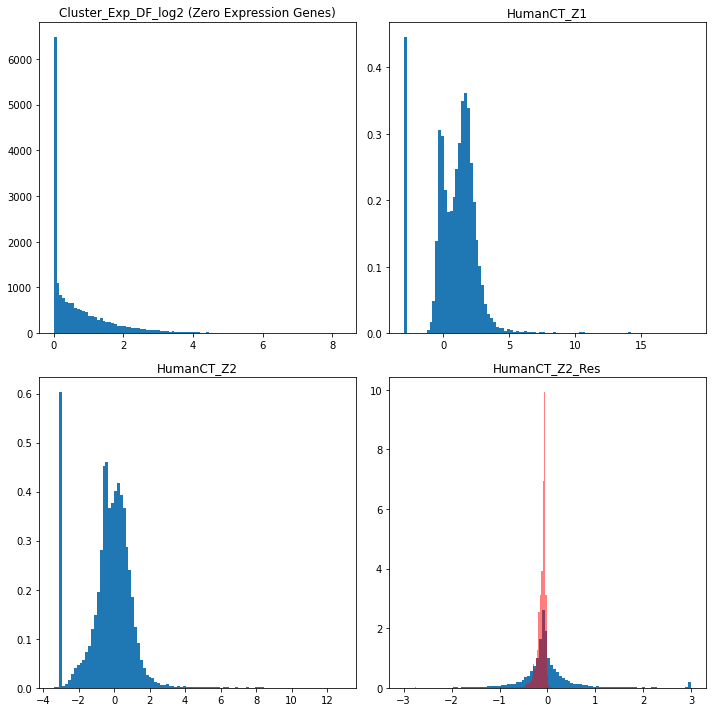

In [106]:
# Create figure and axes
CT_index = 400 

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

# Plot histograms
zero_expr_genes = Cluster_Exp_DF_log2[Cluster_Exp_DF_log2[CT_index] == 0].index
ax1.hist(Cluster_Exp_DF_log2[CT_index], bins=100)
ax1.set_title('Cluster_Exp_DF_log2 (Zero Expression Genes)')

ax2.hist(HumanCT_Z1[CT_index], bins=100, density=True)
#ax2.hist(HumanCT_Z1.loc[zero_expr_genes, CT_index], bins=100, alpha=0.5, color='red', density=True)
ax2.set_title('HumanCT_Z1')

ax3.hist(HumanCT_Z2[CT_index], bins=100, density=True) 
#ax3.hist(HumanCT_Z2.loc[zero_expr_genes, CT_index], bins=100, alpha=0.5, color='red', density=True)
ax3.set_title('HumanCT_Z2')

ax4.hist(HumanCT_Z2_Res[CT_index], bins=100, density=True)
ax4.hist(HumanCT_Z2_Res.loc[zero_expr_genes, CT_index], bins=100, alpha=0.5, color='red', density=True)
ax4.set_title('HumanCT_Z2_Res')

plt.tight_layout()
plt.show()

In [9]:
HumanCT_Z2 = pd.read_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.CT.Exp.Entrez.log2.Z2.HCT.csv", index_col=0)
HumanCT_ExpL = pd.read_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.Cluster.Log2Mean.Exp.csv", index_col=0)

In [17]:
#Expression Level vs Specificity 
ExpLevels = []
TopNBias = []
CommonGenes = list(set(HumanCT_Z2.index.values).intersection(set(HumanCT_ExpL.index.values)))
for g in CommonGenes:
    row_sorted = HumanCT_Z2.loc[g].sort_values(ascending=False)
    top_N = row_sorted.head(10)
    top_N_spec = np.mean(top_N)
    ExpLevels.append(HumanCT_ExpL.loc[g, :].mean())
    TopNBias.append(top_N_spec)
ExpLevels = np.array(ExpLevels)
ExpLevels = np.log10(np.exp2(ExpLevels) )
TopNBias = np.array(TopNBias)


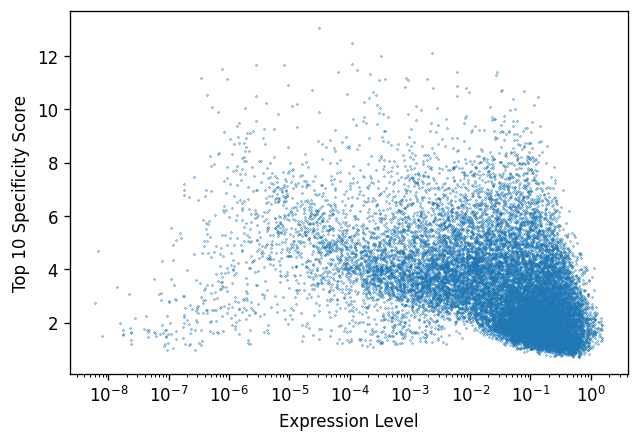

In [19]:
plt.figure(dpi=120)
plt.scatter(ExpLevels, TopNBias, s=0.1)
plt.xscale('log')
plt.xlabel("Expression Level")
plt.ylabel("Top {} Specificity Score".format(10))
plt.show()

### Test remove zero expressed genes from Z1 matrix 


In [134]:
def compute_specificity_matrix(expr_matrix):
    """
    Compute specificity scores for zero-inflated, small-valued expression data
    
    Parameters:
    expr_matrix: genes x cell_types matrix with values >= 0
    """
    n_genes, n_celltypes = expr_matrix.shape
    specificity_matrix = pd.DataFrame(0, index=expr_matrix.index, columns=expr_matrix.columns)

    for gene_idx, expr in expr_matrix.iterrows():
        non_zero_mask = expr > 0
        non_zero_expr = expr[non_zero_mask]
        
        if len(non_zero_expr) == 0:
            specificity_matrix.loc[gene_idx,:] = 0
            continue
            
        expr_mean = np.mean(non_zero_expr)
        expr_std = np.std(non_zero_expr) if len(non_zero_expr) > 1 else expr_mean
        
        # Calculate specificity only for expressed values
        specificity = np.zeros_like(expr)
        specificity[non_zero_mask] = (expr[non_zero_mask] - expr_mean) / (expr_std + 1e-10)
        
        # Zero positions get minimum specificity
        min_spec = np.min(specificity[non_zero_mask])
        specificity[~non_zero_mask] = min_spec
        
        specificity_matrix.loc[gene_idx,:] = specificity
    
    
    return specificity_matrix

In [135]:
#Cluster_Spec_Test = compute_specificity_matrix(Cluster_Exp_DF_log2)
Cluster_Spec_Test = compute_specificity_matrix(Cluster_Exp_DF_log2)

In [143]:
Cluster_Spec_Test.to_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.Cluster.Spec.Test.Nov14.csv")

In [138]:
Cluster_Spec_Test

,0,1,2,3,4,5,6,7,8,9,...,451,452,453,454,455,456,457,458,459,460
1,-0.677861,-0.776735,-0.984381,-0.895981,-1.047597,-0.612090,-0.889426,-1.108662,-1.061541,-1.070014,...,0.680279,-0.941095,0.130000,0.150126,0.085468,-0.813973,-0.616182,0.233031,0.539801,-0.424473
2,-0.546331,0.051687,-0.190684,-0.385970,2.358753,2.776416,4.631447,4.200584,4.218321,4.399845,...,-0.291908,-0.264020,-0.143365,-0.281141,-0.316008,-0.411505,-0.435930,-0.053617,0.386719,0.810633
9,-0.035640,-0.023304,-0.021091,-0.214312,-0.339520,0.003120,0.144501,0.132265,0.333305,0.122954,...,-0.348772,-0.163695,-0.287825,-0.306160,-0.407786,-0.503465,-0.174530,0.446401,0.274315,0.505255
10,-0.516079,-0.447652,-0.516079,-0.516079,-0.516079,-0.281665,-0.025410,0.122032,0.125453,-0.211129,...,-0.280708,-0.166355,-0.300806,-0.349746,-0.516079,-0.516079,-0.516079,-0.243399,-0.231624,-0.171006
12,-0.175265,-0.122047,-0.126255,-0.175265,-0.086524,-0.175265,-0.135673,-0.147180,-0.138983,-0.150071,...,-0.153344,-0.142858,-0.163860,-0.170241,-0.105649,-0.110475,-0.175265,-0.158079,-0.138928,-0.157101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113523639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
114483833,4.724558,1.572617,0.105413,0.391617,-0.715095,0.728519,-0.288731,-0.187391,0.596562,0.473062,...,-0.279228,-0.409514,-0.441029,-0.413070,-0.715095,-0.715095,-0.715095,-0.137687,-0.241191,-0.184848
114515518,-0.503102,-0.503102,-0.503102,-0.503102,-0.503102,-0.503102,-0.503102,-0.503102,-0.503102,-0.503102,...,-0.278775,-0.503102,-0.307597,-0.503102,-0.503102,-0.503102,-0.503102,-0.360511,-0.259974,-0.503102
116033993,-0.252836,-0.252836,-0.252836,-0.252836,-0.252836,-0.252836,-0.252836,-0.252836,-0.252836,-0.252836,...,0.081195,-0.156489,-0.105266,-0.171640,-0.252836,-0.252836,1.444906,-0.019235,-0.219080,-0.232691


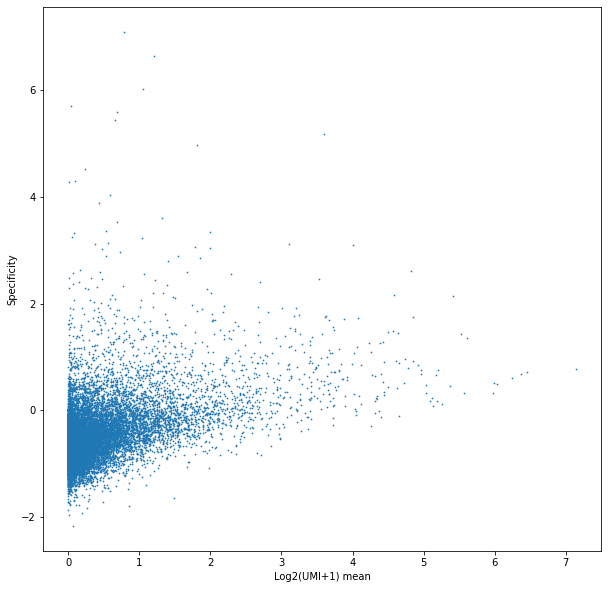

In [147]:
# Plot Expression vs Specificity of cell types
CT_index = 200

fig = plt.figure(figsize=(10, 10))
plt.scatter(Cluster_Exp_DF_log2[CT_index], Cluster_Spec_Test[CT_index], s=0.5)
plt.xlabel("Log2(UMI+1) mean")
plt.ylabel("Specificity")
plt.show()


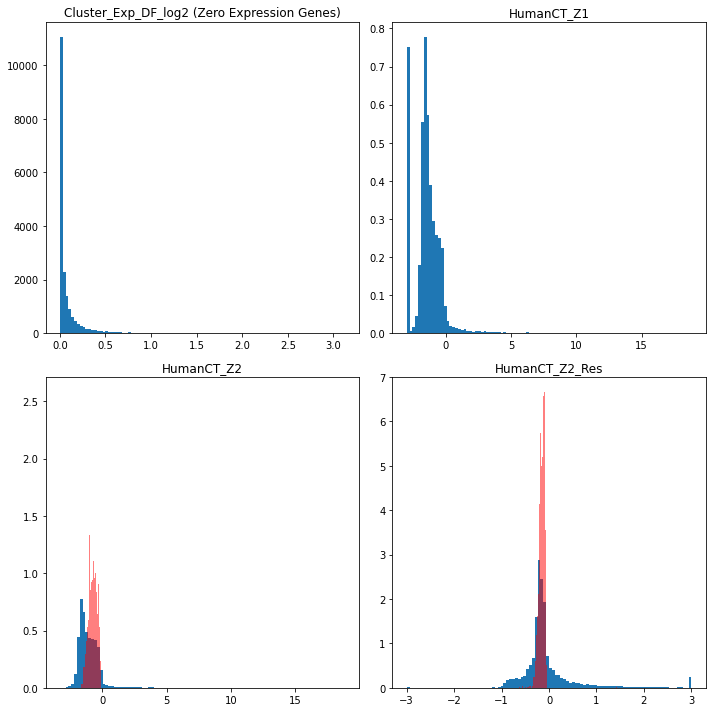

In [148]:
# Create figure and axes
CT_index = 1 

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

# Plot histograms
zero_expr_genes = Cluster_Exp_DF_log2[Cluster_Exp_DF_log2[CT_index] == 0].index
ax1.hist(Cluster_Exp_DF_log2[CT_index], bins=100)
ax1.set_title('Cluster_Exp_DF_log2 (Zero Expression Genes)')

ax2.hist(HumanCT_Z1[CT_index], bins=100, density=True)
#ax2.hist(HumanCT_Z1.loc[zero_expr_genes, CT_index], bins=100, alpha=0.5, color='red', density=True)
ax2.set_title('HumanCT_Z1')

ax3.hist(Cluster_Spec_Test[CT_index], bins=100, density=True) 
ax3.hist(Cluster_Spec_Test.loc[zero_expr_genes, CT_index], bins=100, alpha=0.5, color='red', density=True)
ax3.set_title('HumanCT_Z2')

ax4.hist(HumanCT_Z2_Res[CT_index], bins=100, density=True)
ax4.hist(HumanCT_Z2_Res.loc[zero_expr_genes, CT_index], bins=100, alpha=0.5, color='red', density=True)
ax4.set_title('HumanCT_Z2_Res')

plt.tight_layout()
plt.show()

In [125]:
expr_matrix = Cluster_Exp_DF_log2
specificity_matrix = pd.DataFrame(0, index=expr_matrix.index, columns=expr_matrix.columns)

for gene_idx, expr in expr_matrix.iterrows():
    non_zero_mask = expr > 0
    non_zero_expr = expr[non_zero_mask]
    
    if len(non_zero_expr) == 0:
        continue
        
    # Calculate specificity incorporating both components
    expr_mean = np.mean(non_zero_expr)
    expr_std = np.std(non_zero_expr) if len(non_zero_expr) > 1 else expr_mean
    
    # Modified score combining expression level and zero-fraction
    zero_fraction = 1 - (np.sum(non_zero_mask) / len(expr))
    scaled_expr = (expr - expr_mean) / (expr_std + 1e-10)
    specificity_matrix.loc[gene_idx,:] = scaled_expr * (1 - zero_fraction)

KeyboardInterrupt: 

In [124]:
specificity_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.67197948, -0.76999592, -0.97583928, ...,  0.23100866,
         0.53511739, -0.4207903 ],
       [-0.54514591,  0.0515745 , -0.19027075, ..., -0.0535008 ,
         0.38588035,  0.80887425],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [114]:
Cluster_Exp_DF_log2.shape

(18839, 461)

In [115]:
log2_umi_matrix = Cluster_Exp_DF_log2
count_matrix = np.exp2(log2_umi_matrix) - 1

n_genes, n_celltypes = count_matrix.shape
specificity_matrix = np.zeros_like(log2_umi_matrix)

for gene_idx, row in count_matrix.iterrows():
    counts = row
    
    # Fit ZINB model
    exog = np.ones_like(counts)
    try:
        model = sm.ZeroInflatedNegativeBinomialP(counts, exog)
        results = model.fit(disp=0)
        
        # Get probabilities of observing counts
        log_probs = results.predict(exog, which='prob')
        
        # Convert to specificity score
        specificity = -np.log10(log_probs + 1e-10)
        specificity_matrix[gene_idx,:] = specificity
        
    except:
        # Fallback if ZINB fit fails
        specificity_matrix[gene_idx,:] = stats.zscore(counts)

    break 

/home/jw3514/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:3937: RuntimeWarning: invalid value encountered in log
  a1 * np.log(a1) + y * np.log(mu) -
/home/jw3514/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:3938: RuntimeWarning: invalid value encountered in log
  (y + a1) * np.log(a2))
/home/jw3514/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:3937: RuntimeWarning: invalid value encountered in log
  a1 * np.log(a1) + y * np.log(mu) -
/home/jw3514/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:3938: RuntimeWarning: invalid value encountered in log
  (y + a1) * np.log(a2))
/home/jw3514/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:3974: RuntimeWarning: invalid value encountered in log
  dgterm = dgpart + np.log(a1 / a2) + 1 - a3 / a2
/home/jw3514/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2385: Runti

In [120]:
HumanCTExp_Entrez

,0,1,2,3,4,5,6,7,8,9,...,451,452,453,454,455,456,457,458,459,460
79933,0.000000,0.000404,0.000000,0.000000,0.001342,0.002574,0.006439,0.005513,0.004645,0.003872,...,0.016427,0.005551,0.025918,0.012865,0.012658,0.013752,0.016892,0.025887,0.091191,0.156131
94015,0.028571,0.035974,0.020864,0.176938,0.106040,0.066924,0.128370,0.112952,0.168645,0.129138,...,0.023203,0.008921,0.016019,0.018498,0.065401,0.013752,0.067568,0.028022,0.032838,0.064057
55238,0.000000,0.006871,0.011923,0.033797,0.016107,0.038610,0.077264,0.039823,0.056645,0.050920,...,1.520123,0.452022,0.611411,0.803077,0.793249,0.387033,1.929054,1.227916,0.842467,1.061523
23429,0.495238,0.248990,0.296572,0.817097,0.287248,0.205920,0.342455,0.266990,0.334968,0.251501,...,2.995072,0.830095,2.034737,1.585218,2.021097,1.123772,2.820946,3.152922,3.804748,3.322681
6534,0.000000,0.003234,0.005961,0.005964,0.004027,0.005148,0.009256,0.005340,0.010710,0.010455,...,3.118583,0.885210,1.746580,1.606491,1.453586,0.412574,4.814189,3.034828,2.112714,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151888,0.419048,0.042441,0.000000,0.007952,0.000000,0.000000,0.000000,0.000747,0.000645,0.002130,...,0.018583,0.007732,0.007019,0.008913,0.006329,0.009823,0.037162,0.021084,0.013313,0.011685
26108,0.000000,0.000808,0.002981,0.000000,0.002685,0.005148,0.003622,0.001723,0.002968,0.003291,...,0.024743,0.003370,0.217603,0.278819,0.805907,0.247544,0.902027,0.092341,0.809408,2.190061
7652,0.000000,0.000000,0.000000,0.001988,0.000000,0.000000,0.000402,0.000402,0.001290,0.000387,...,0.020329,0.001983,0.007559,0.016060,0.044304,0.041257,0.067568,0.051241,0.126026,0.044770
64288,0.009524,0.005255,0.002981,0.003976,0.004027,0.006435,0.004427,0.005139,0.006452,0.005421,...,0.254723,0.138977,0.276278,0.201379,0.213080,0.141454,0.114865,0.271417,0.278456,0.435450


In [118]:
count_matrix

,0,1,2,3,4,5,6,7,8,9,...,451,452,453,454,455,456,457,458,459,460
1,0.033558,0.027794,0.015794,0.020886,0.012169,0.037410,0.021264,0.008679,0.011371,0.010886,...,0.116079,0.018284,0.081878,0.083111,0.079157,0.025632,0.037170,0.088201,0.107247,0.048477
2,0.006623,0.147858,0.088374,0.042695,0.904885,1.087821,2.137413,1.854228,1.865364,1.981867,...,0.064453,0.070990,0.099740,0.066972,0.058835,0.036866,0.031321,0.121625,0.235475,0.355983
9,0.006623,0.006795,0.006825,0.004143,0.002408,0.007162,0.009130,0.008960,0.011765,0.008830,...,0.002280,0.004845,0.003124,0.002870,0.001463,0.000000,0.004694,0.013346,0.010941,0.014170
10,0.000000,0.000280,0.000000,0.000000,0.000000,0.000892,0.001838,0.002383,0.002396,0.001153,...,0.000896,0.001318,0.000822,0.000641,0.000000,0.000000,0.000000,0.001034,0.001077,0.001301
12,0.000000,0.001121,0.001034,0.000000,0.001863,0.000000,0.000837,0.000597,0.000768,0.000537,...,0.000469,0.000687,0.000250,0.000117,0.001463,0.001363,0.000000,0.000370,0.000769,0.000390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113523639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
114483833,0.006623,0.002806,0.001034,0.001379,0.000000,0.001786,0.000558,0.000680,0.001626,0.001477,...,0.000569,0.000412,0.000374,0.000408,0.000000,0.000000,0.000000,0.000740,0.000615,0.000683
114515518,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000142,0.000000,0.000125,0.000000,0.000000,0.000000,0.000000,0.000092,0.000154,0.000000
116033993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001395,0.000412,0.000624,0.000350,0.000000,0.000000,0.007050,0.000980,0.000154,0.000098


In [150]:
#0 expressed genes 

In [151]:
#Expression level vs specificity 


In [152]:
HumanCT_OverallEXP = pd.read_csv("/home/jw3514/Work/CellType_Psy/dat2/ExpMatch/HumanCT.MatchDF.csv", index_col=0)

<Axes: >

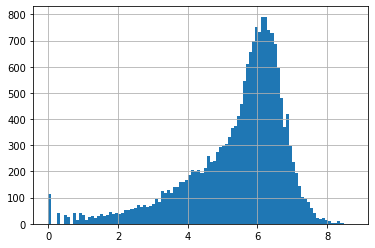

In [156]:
np.log10(HumanCT_OverallEXP["Exp"] + 1).hist(bins=100)

In [157]:
HumanCT_Z2 = pd.read_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.CT.Exp.Entrez.log2.Z2.HCT.z1clip3.csv", index_col=0)

In [162]:
# for each gene, calculate its specificity score of top N cell types 
topNCT = 1
Gene_Spec_Score = []
for g, row in HumanCT_Z2.iterrows():
    row_sorted = row.sort_values(ascending=False)
    top_N = row_sorted.head(topNCT)
    top_N_spec = np.mean(top_N)
    Gene_Spec_Score.append(top_N_spec)
Gene_Spec_Score = np.array(Gene_Spec_Score)



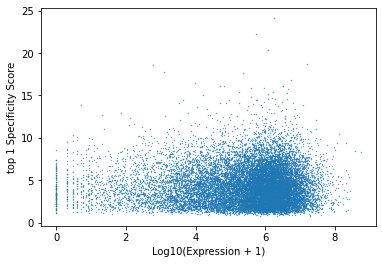

In [163]:
plt.scatter(np.log10(HumanCT_OverallEXP["Exp"] + 1), Gene_Spec_Score, s=0.1)
plt.xlabel("Log10(Expression + 1)")
plt.ylabel("top {} Specificity Score".format(topNCT))
plt.show()

In [173]:
topNCT = 1
Gene_Spec_Score = []
Gene_Exp = []
for g, row in HumanCT_Z2.iterrows():
    row_sorted = row.sort_values(ascending=False)
    top_N = row_sorted.head(topNCT)
    top_N_spec = np.mean(top_N)
    Gene_Spec_Score.append(top_N_spec)
    Gene_Exp.append(HumanCT_OverallEXP.loc[g, "Exp"])
    
Gene_Spec_Score = np.array(Gene_Spec_Score)
Gene_Exp = np.array(Gene_Exp)


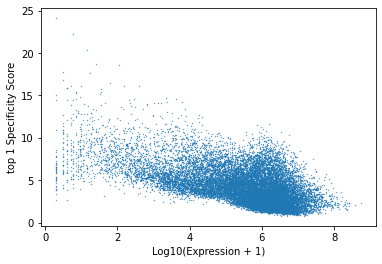

In [174]:
plt.scatter(np.log10(Gene_Exp + 1), Gene_Spec_Score, s=0.1)
plt.xlabel("Log10(Expression + 1)")
plt.ylabel("top {} Specificity Score".format(topNCT))
plt.show()

In [166]:
HumanCT_Z2_test = pd.read_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.Cluster.Log2Mean.Z2.csv", index_col=0)

In [167]:
topNCT = 10
Gene_Spec_Score = []
for g, row in HumanCT_Z2.iterrows():
    row_sorted = row.sort_values(ascending=False)
    top_N = row_sorted.head(topNCT)
    top_N_spec = np.mean(top_N)
    Gene_Spec_Score.append(top_N_spec)
Gene_Spec_Score = np.array(Gene_Spec_Score)

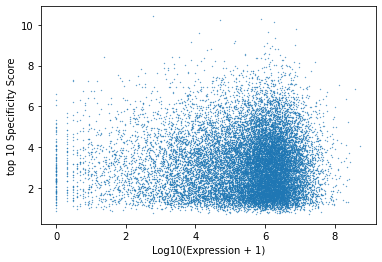

In [168]:
plt.scatter(np.log10(HumanCT_OverallEXP["Exp"] + 1), Gene_Spec_Score, s=0.1)
plt.xlabel("Log10(Expression + 1)")
plt.ylabel("top {} Specificity Score".format(topNCT))
plt.show()

In [22]:
# Try specificity score of each cell type 
Cluster_Exp_DF_log2 = pd.read_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.Cluster.Log2Mean.Exp.csv", index_col=0)

In [26]:
Cluster_Exp_DF_log2.head(10)

,0,1,2,3,4,5,6,7,8,9,...,451,452,453,454,455,456,457,458,459,460
1,0.047619,0.039551,0.022608,0.029821,0.017450,0.052986,0.030356,0.012467,0.016312,0.015620,...,0.158439,0.026140,0.113538,0.115180,0.109905,0.036513,0.052652,0.121945,0.146977,0.068295
2,0.009524,0.198945,0.122174,0.060318,0.929704,1.061998,1.649576,1.513101,1.518719,1.576216,...,0.090112,0.098945,0.137162,0.093522,0.082478,0.052230,0.044493,0.165590,0.305066,0.439340
9,0.009524,0.009770,0.009814,0.005964,0.003470,0.010296,0.013113,0.012869,0.016874,0.012683,...,0.003285,0.006973,0.004500,0.004134,0.002110,0.000000,0.006757,0.019127,0.015699,0.020300
10,0.000000,0.000404,0.000000,0.000000,0.000000,0.001287,0.002650,0.003434,0.003452,0.001662,...,0.001292,0.001900,0.001185,0.000925,0.000000,0.000000,0.000000,0.001491,0.001553,0.001876
12,0.000000,0.001617,0.001490,0.000000,0.002685,0.000000,0.001207,0.000861,0.001108,0.000774,...,0.000676,0.000991,0.000360,0.000168,0.002110,0.001965,0.000000,0.000534,0.001109,0.000563
13,0.000000,0.000000,0.000000,0.000000,0.001342,0.000000,0.000000,0.000402,0.000000,0.000387,...,0.000616,0.000198,0.000540,0.000589,0.002110,0.000000,0.000000,0.000934,0.001109,0.002699
14,0.057143,0.041839,0.062228,0.079523,0.033557,0.026493,0.048161,0.038325,0.050961,0.052472,...,0.506955,0.268478,0.303953,0.335175,0.398465,0.116581,0.424980,0.582394,0.528781,0.426525
15,0.000000,0.000808,0.000000,0.000000,0.006711,0.007188,0.005702,0.006209,0.006194,0.006696,...,0.057373,0.021232,0.022213,0.028733,0.029536,0.017682,0.090962,0.061668,0.039000,0.041771
16,0.028571,0.049016,0.057757,0.023032,0.046855,0.062213,0.095115,0.070289,0.088926,0.077229,...,1.443226,0.697172,0.860862,0.931934,1.056743,0.462890,1.349201,1.427404,1.291812,1.322821
18,0.119857,0.074747,0.071929,0.110172,0.074385,0.099221,0.141044,0.119988,0.163986,0.116954,...,1.497932,0.977007,1.181064,1.143105,1.286759,0.864150,1.962310,1.563465,1.772323,1.798461


In [29]:
# Get column sums and mean of sums
col_sums = Cluster_Exp_DF_log2.sum(axis=0)
sum_mean = col_sums.mean()

# Normalize each column to have the same sum (1000 * mean)
target_sum = 1000 * sum_mean
normalized_expr = Cluster_Exp_DF_log2.div(col_sums, axis=1) * target_sum

In [31]:
normalized_expr.head(10)

,0,1,2,3,4,5,6,7,8,9,...,451,452,453,454,455,456,457,458,459,460
1,254.898772,214.293384,116.658765,147.850645,96.835673,270.723100,113.788250,56.692521,58.827328,67.278138,...,89.173569,24.632015,89.918610,90.763090,78.400165,39.273411,28.154231,68.527256,89.309667,39.244206
2,50.979754,1077.908482,630.428838,299.051092,5159.325910,5426.125565,6183.373752,6880.723081,5477.139664,6788.842833,...,50.717129,93.237595,108.628208,73.696315,58.835768,56.178868,23.791467,93.053508,185.371548,252.457587
9,50.979754,52.932804,50.639248,29.570129,19.255122,52.605993,49.152331,58.520425,60.855194,54.628062,...,1.849115,6.570410,3.563569,3.257907,1.504954,0.000000,3.613000,10.748597,9.539344,11.664868
10,0.000000,2.190028,0.000000,0.000000,0.000000,6.575749,9.932995,15.616110,12.450246,7.158930,...,0.727220,1.790653,0.938639,0.728839,0.000000,0.000000,0.000000,0.837597,0.943757,1.077738
12,0.000000,8.760111,7.690135,0.000000,14.897796,0.000000,4.525308,3.916937,3.994967,3.335567,...,0.380511,0.934095,0.285086,0.132516,1.504954,2.113182,0.000000,0.299947,0.674112,0.323598
13,0.000000,0.000000,0.000000,0.000000,7.448898,0.000000,0.000000,1.827904,0.000000,1.667784,...,0.346709,0.186819,0.427628,0.463807,1.504954,0.000000,0.000000,0.524908,0.674112,1.550839
14,305.878526,226.689269,321.100706,394.268386,186.222447,135.361550,180.529172,174.282527,183.786031,226.000971,...,285.326582,252.991275,240.720915,264.120574,284.244253,125.395912,227.246812,327.277149,321.311015,245.093969
15,0.000000,4.380055,0.000000,0.000000,37.244489,36.725312,21.374425,28.236500,22.336546,28.840115,...,32.290949,20.007332,17.592154,22.641646,21.069351,19.018639,48.639668,34.654184,23.698331,24.002846
16,152.939263,265.572964,298.030302,114.189612,260.017864,317.870728,356.535491,319.636613,320.703744,332.630024,...,812.282766,656.955444,681.775072,734.371149,753.825826,497.889014,721.449955,802.131333,784.962431,760.132508
18,641.578296,404.987076,371.161752,546.225983,412.793084,506.955655,528.696628,545.635442,591.403549,503.726323,...,843.072750,920.647937,935.364408,900.776029,917.907272,929.487760,1049.294186,878.590893,1076.942285,1033.449145


In [33]:
# Calculate total expression sum across cell types for each gene
total_exp_per_gene = normalized_expr.sum(axis=1)

# Divide each expression value by the total for that gene to get fraction
specificity_scores = normalized_expr.div(total_exp_per_gene, axis=0)



In [35]:
specificity_scores.head(10)


,0,1,2,3,4,5,6,7,8,9,...,451,452,453,454,455,456,457,458,459,460
1,0.005384,0.004526,0.002464,0.003123,0.002045,0.005718,0.002403,0.001197,0.001243,0.001421,...,0.001884,0.000520,0.001899,0.001917,0.001656,0.000830,0.000595,0.001447,0.001886,0.000829
2,0.000293,0.006198,0.003625,0.001719,0.029665,0.031199,0.035553,0.039563,0.031493,0.039035,...,0.000292,0.000536,0.000625,0.000424,0.000338,0.000323,0.000137,0.000535,0.001066,0.001452
9,0.010346,0.010743,0.010277,0.006001,0.003908,0.010677,0.009976,0.011877,0.012351,0.011087,...,0.000375,0.001333,0.000723,0.000661,0.000305,0.000000,0.000733,0.002181,0.001936,0.002367
10,0.000000,0.002089,0.000000,0.000000,0.000000,0.006273,0.009476,0.014898,0.011877,0.006830,...,0.000694,0.001708,0.000895,0.000695,0.000000,0.000000,0.000000,0.000799,0.000900,0.001028
12,0.000000,0.002336,0.002051,0.000000,0.003973,0.000000,0.001207,0.001044,0.001065,0.000889,...,0.000101,0.000249,0.000076,0.000035,0.000401,0.000564,0.000000,0.000080,0.000180,0.000086
13,0.000000,0.000000,0.000000,0.000000,0.012648,0.000000,0.000000,0.003104,0.000000,0.002832,...,0.000589,0.000317,0.000726,0.000788,0.002555,0.000000,0.000000,0.000891,0.001145,0.002633
14,0.002383,0.001766,0.002502,0.003072,0.001451,0.001055,0.001406,0.001358,0.001432,0.001761,...,0.002223,0.001971,0.001875,0.002058,0.002214,0.000977,0.001770,0.002550,0.002503,0.001909
15,0.000000,0.000417,0.000000,0.000000,0.003547,0.003498,0.002036,0.002689,0.002127,0.002747,...,0.003075,0.001906,0.001676,0.002156,0.002007,0.001811,0.004633,0.003301,0.002257,0.002286
16,0.000538,0.000934,0.001049,0.000402,0.000915,0.001118,0.001254,0.001125,0.001128,0.001170,...,0.002858,0.002311,0.002399,0.002584,0.002652,0.001752,0.002538,0.002822,0.002762,0.002675
18,0.001228,0.000775,0.000711,0.001046,0.000790,0.000970,0.001012,0.001045,0.001132,0.000964,...,0.001614,0.001762,0.001791,0.001724,0.001757,0.001779,0.002009,0.001682,0.002062,0.001978


In [36]:
specificity_scores.to_csv("/home/jw3514/Work/CellType_Psy/dat/HumanCTExpressionMats/Human.Cluster.Spec.Score.csv")

In [1]:
specificity_scores

NameError: name 'specificity_scores' is not defined